In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Import Successful")

Import Successful


In [2]:
df1 = pd.read_csv("Data-Asset/archive/tmdb_5000_credits.csv")
df2 = pd.read_csv("Data-Asset/archive/tmdb_5000_movies.csv")

print("Data Read!!")
print("Shapes : {},{}".format(df1.shape,df2.shape))

Data Read!!
Shapes : (4803, 4),(4803, 20)


In [3]:
print(df1.columns)
print(df2.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [4]:
df1.columns = ['id', 'title_', 'cast', 'crew']
df2 = df2.merge(df1, on='id')

In [5]:
C = df2["vote_average"].mean()
print(C)

6.092171559442016


In [6]:
m = df2["vote_count"].quantile(0.9)
print(m)

1838.4000000000015


In [7]:
q_movies = df2.copy().loc[df2["vote_count"] >= m]
q_movies.shape

(481, 23)

In [8]:
def weighted_rating(x,m=m,C=C):
    
    v = x["vote_count"]
    R = x["vote_average"]
    
    return round((v/(v+m)*R) + (m/(m+v)*C),2)

In [9]:
q_movies['score'] = q_movies.apply(weighted_rating,axis=1)

In [10]:
q_movies = q_movies.sort_values('score',
                                ascending=False)

In [11]:
f_list = []
columns = ['title', 'score']
for i in range(q_movies.shape[0]):
    
    f_list.append([q_movies[columns[0]].values[i],
                   q_movies[columns[1]].values[i]])
    
print("Total Movies in the Dictionary : {}".format(len(f_list)))

Total Movies in the Dictionary : 481


In [12]:
def getTop10Recommendations(f_list):
    
    for i in range(10):
        
        print("#{} :".format(i+1))
        print("Movie Name : {}".format(f_list[i][0]))
        print("Weighted Ratings : {}".format(f_list[i][1]))
        print("------------------------")

In [13]:
getTop10Recommendations(f_list)

#1 :
Movie Name : The Shawshank Redemption
Weighted Ratings : 8.06
------------------------
#2 :
Movie Name : Fight Club
Weighted Ratings : 7.94
------------------------
#3 :
Movie Name : The Dark Knight
Weighted Ratings : 7.92
------------------------
#4 :
Movie Name : Pulp Fiction
Weighted Ratings : 7.9
------------------------
#5 :
Movie Name : Inception
Weighted Ratings : 7.86
------------------------
#6 :
Movie Name : The Godfather
Weighted Ratings : 7.85
------------------------
#7 :
Movie Name : Interstellar
Weighted Ratings : 7.81
------------------------
#8 :
Movie Name : Forrest Gump
Weighted Ratings : 7.8
------------------------
#9 :
Movie Name : The Lord of the Rings: The Return of the King
Weighted Ratings : 7.73
------------------------
#10 :
Movie Name : The Empire Strikes Back
Weighted Ratings : 7.7
------------------------


In [21]:
pop= df2.sort_values('popularity', ascending=False)

In [22]:
msum = pop['popularity'].head(6).sum()
def normalise(x):
    
    return x['popularity']/msum

pop['popularity_score'] = pop.apply(normalise,
                                    axis=1)

In [23]:
f_list = []
columns = ['title','popularity']

for i in range(pop.shape[0]):
    
    f_list.append([pop[columns[0]].values[i],
                   round(pop[columns[1]].values[i],2)])
    
print("Total Movies in the Dictionary : {}".format(len(f_list)))

Total Movies in the Dictionary : 4803


In [24]:
getTop10Recommendations(f_list)

#1 :
Movie Name : Minions
Weighted Ratings : 875.58
------------------------
#2 :
Movie Name : Interstellar
Weighted Ratings : 724.25
------------------------
#3 :
Movie Name : Deadpool
Weighted Ratings : 514.57
------------------------
#4 :
Movie Name : Guardians of the Galaxy
Weighted Ratings : 481.1
------------------------
#5 :
Movie Name : Mad Max: Fury Road
Weighted Ratings : 434.28
------------------------
#6 :
Movie Name : Jurassic World
Weighted Ratings : 418.71
------------------------
#7 :
Movie Name : Pirates of the Caribbean: The Curse of the Black Pearl
Weighted Ratings : 271.97
------------------------
#8 :
Movie Name : Dawn of the Planet of the Apes
Weighted Ratings : 243.79
------------------------
#9 :
Movie Name : The Hunger Games: Mockingjay - Part 1
Weighted Ratings : 206.23
------------------------
#10 :
Movie Name : Big Hero 6
Weighted Ratings : 203.73
------------------------


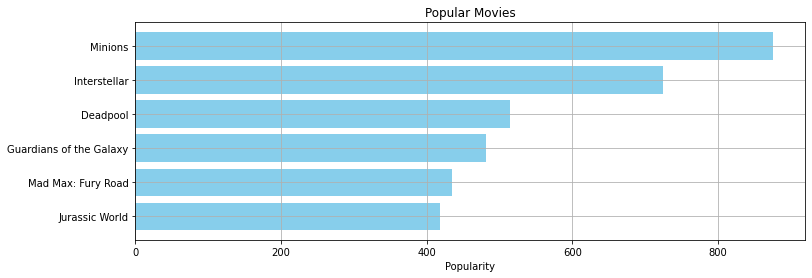

In [20]:
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.grid()

In [80]:
pop[['title','popularity']].to_csv('Data-Asset/pop.csv',index=False)

In [81]:
q_movies[['title','score']].to_csv('Data-Asset/wt-rating.csv',index=False)